In [1]:
import bs4 as bs
import requests

import pandas as pd

import os

import time
import random

import sqlalchemy as sal
from sqlalchemy import create_engine
from sqlalchemy.sql import text

import duckdb


import plotly.express as px

In [2]:
# union of all season and team to one table for each table
servername = '****'
football_data = 'Football_Data'
trusted_conneciton = '?trusted_conneciton=yes'
driver = '&driver=ODBC+Driver+17+for+SQL+Server'

In [3]:
#create engine url to connect to sql server
engine = create_engine(f'mssql+pyodbc://{servername}/{football_data}{trusted_conneciton}{driver}')
engine

Engine(mssql+pyodbc://DESKTOP-5IAPFQC\MSSQLSERVER2019/Football_Data?driver=ODBC+Driver+17+for+SQL+Server&trusted_conneciton=yes)

In [4]:
con = engine.connect()

In [5]:
years = range(2010,2024)

In [6]:
weeks = range(1,18)

In [7]:
position_li = ['qb', 'rb', 'wr', 'te', 'k', 'dst', 'dl', 'lb', 'db']

In [54]:
def clean_df(df, year, week, position):
    try:
        df = df.droplevel(0, axis=1)

    except:
        pass

    df['Player'] = df['Player'].apply(lambda x: x.split(' ')[:2])
    df['Player'] = df['Player'].apply(lambda x: ' '.join(x))

    #Add Position Column
    df['Position'] = [position.upper()] * len(df)

    #add Year Column
    df['Year'] = [year] * len(df)

    df['Week'] = [week] * len(df)

    return df

In [55]:
def qb_col(df):
    #quarterback columns
    df.columns = ['Rank', 'Player', 'Pass Completions', 'Pass Attempts',
                  'Pass Completion/Attempts', 'Passing Yards', 'Passsing Yards/Attempt', 'Passing Touchdowns', 
                  'Interception', 'Sacks', 'Rushing Attempts', 'Rushing Yards', 
                  'Rushing Touchdown', 'Fumbles', 'Games Played', 'Fantasy Football Points', 
                  'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']
    return df

In [56]:
def rb_col(df):
    #Running Back
    df.columns = ['Rank', 'Player', 'Rushing Attempts', 'Rushing Yards', 'Rushing Yards/Attempts',
                  'Longest Rushing', 'Rushing 20+', 'Rushing Touchdown',
                  'Recptions', 'TGT', 'Receiving Yards', 'Receiving Yards/Reception',
                  'Receiving Touchdowns', 'Fumbles', 'Games Played', 'Fantasy Football Points', 'FTPS/Game', 'ROST',
                  'Position', 'Year', 'Week']
    return df

In [57]:
def wr_col(df):
    #wide receiver
    df.columns = ['Rank', 'Player', 'Receiving Receptions', 'Receiving Target', 'Receiving Yards',
                  'Yards/Reception', 'Longest Reception', 'Receiving 20+',
                  'Receiving Touchdowns', 'Rushing Attempts', 'Rushing Yards',
                  'Rushing Touchdown', 'Fumbles', 'Games Played', 'Fantasy Football Points', 'FTPS/Game', 'ROST',
                  'Position', 'Year', 'Week']
    return df

In [58]:
def te_col(df):
    #tight end
    df.columns = ['Rank', 'Player', 'Receiving Receptions', 'Receiving Target', 'Receiving Yards',
                  'Yards/Reception', 'Longest Reception', 'Receiving 20+',
                  'Receiving Touchdowns', 'Rushing Attempts', 'Rushing Yards',
                  'Rushing Touchdown', 'Fumbles', 'Games Played', 'Fantasy Football Points',
                   'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']
    return df

In [59]:
def k_col(df):
    #kicking
    df.columns = ['Rank', 'Player', 'Field Goals', 'Field Attempts', 'Percentage',
                  'Longest Field', '1-19 Yards', '20-29 Yards', '30-39 Yards',
                  '40-49 Yards', '50+ Yards', 'Extra Points Made', 'Extra Points Attempted',
                  'Games Played', 'Fantasy Football Points',
                   'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']
    return df

In [60]:
def def_st_col(df):
    # Defese and Special Teams
    df.columns = ['Rank', 'Player', 'Sack', 'Interceptions', 
                  'Fumble Recovery', 'Forced Fumble', 'Defense Touchdown', 'Safety', 
                  'Special Touchdown', 'Games Played', 'Fantasy Football Points', 'FTPS/Game', 
                  'ROST', 'Position', 'Year', 'Week']
    return df

In [61]:
def dl_col(df):
    # defensive lineman
    df.columns = ['Rank', 'Player', 'Tackle', 'Assist', 
                  'Sack', 'Pass Defended', 'Interception', 'Forced Fumble', 
                  'Fumble Recovery', 'Defend Touchdown', 'Games Played', 'Fantasy Football Points', 
                  'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']
    return df

In [62]:
def lb_col(df):
    #line backer
    df.columns = ['Rank', 'Player', 'Tackle', 'Assist', 'Sack', 'Pass Defended',
                  'Interception', 'Forced Fumble', 'Fumble Recovery', 'Defend Touchdown',
                  'Games Played', 'Fantasy Football Points', 'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']    
    return df

In [63]:
def db_col(df):
    # defensive back
    df.columns = ['Rank', 'Player', 'Tackle', 'Assist', 'Sack', 'Pass Defended',
                  'Interception', 'Forced Fumble', 'Fumble Recovery', 'Defend Touchdown',
                  'Games Played', 'Fantasy Football Points', 'FTPS/Game', 'ROST', 'Position', 'Year', 'Week']
    return df

In [18]:
# webscrape positions
for year in years:    
    for week in weeks:
        for position in position_li:

            print(year, week, position)
            
            url = f'https://www.fantasypros.com/nfl/stats/{position}.php?week={week}&range=week&year={year}'

            df = pd.read_html(url)[0]

            time.sleep(random.randrange(7,10))

            df = clean_df(df, year, week, position)

            if position == 'qb': 
                df = qb_col(df)
            elif position == 'rb':
                df = rb_col(df)
            elif position == 'wr':
                df = wr_col(df)
            elif position == 'te':
                df = te_col(df)
            elif position == 'k':
                df = k_col(df)
            elif position == 'dst':
                df = def_st_col(df)
            elif position == 'dl':
                df = dl_col(df)
            elif position == 'lb':
                df = lb_col(df)
            elif position == 'db':
                df = db_col(df)
            else:
                print('DNE', position, year)


            df.to_csv(f'NFL_Data_{year}/Weekly Stats/{position}_{week}_{year}')

In [20]:
# Concat each position by year and upload to sql MSSQLSERVER2019
for position in position_li:

    position_df = pd.DataFrame()
    
    for year in years:

        file_li = os.listdir(f'NFL_Data_{year}/Weekly Stats/')

        for file in file_li:

            if position in file:
                df = pd.read_csv(f'NFL_Data_{year}/Weekly Stats/{file}', index_col=0)
                
                position_df = pd.concat([position_df, df], axis=0)


    position_df.to_sql(f'{position.upper()}_Player_Weekly_Stats', con=con, if_exists='replace')


In [8]:
# get team for each player data from sql, join TEAM column, save in SQL and CSV

for position in position_li:

    #join all years of that position
    query = f'''select {position}.*, Roster.Team
    from {position.upper()}_Player_Weekly_Stats {position}
    join Roster on
    ({position}.Player = Roster.Player) and
    ({position}.Year = Roster.Year);'''

    # read sql
    position_df = pd.read_sql(query, con)

    
    position_df.to_sql(f'{position.upper()}_Player_Weekly_Stats', con=con, if_exists='replace')
    position_df.to_csv(f'Weekly Stats/{position.upper()}_Player_Weekly_Stats')

In [ ]:
stop

In [ ]:
need to join date, day of the week... win/loss?

In [6]:
position = position_li[0]

In [43]:
file = f'Weekly Stats/{position}_Player_Weekly_Stats'
df = pd.read_csv(file, index_col=0)

In [44]:
df

,index,Rank,Player,Tackle,Assist,Sack,Pass Defended,Interception,Forced Fumble,Fumble Recovery,Defend Touchdown,Games Played,Fantasy Football Points,FTPS/Game,ROST,Position,Year,Week,Team
0,165,166,Dominique Barber,0,0,0.0,0,0,0,0,0,1,0.0,0.0,0.0%,DB,2010,8,Texans
1,168,169,Sabby Piscitelli,0,0,0.0,0,0,0,0,0,1,0.0,0.0,0.0%,DB,2010,8,Browns
2,168,169,Sabby Piscitelli,0,0,0.0,0,0,0,0,0,1,0.0,0.0,0.0%,DB,2010,8,Buccaneers
3,170,171,Trumaine McBride,0,0,0.0,0,0,0,0,0,1,0.0,0.0,0.0%,DB,2010,8,Cardinals
4,171,172,Tyron Brackenridge,0,0,0.0,0,0,0,0,0,1,0.0,0.0,0.0%,DB,2010,8,Jaguars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63114,10,11,Darrelle Revis,4,0,1.0,1,0,0,0,0,1,14.0,14.0,0.0%,DB,2013,14,Buccaneers
63115,11,12,Marcus Gilchrist,6,1,0.0,0,0,0,1,0,1,13.8,13.8,0.0%,DB,2013,14,Chargers
63116,15,16,Terrell Thomas,9,0,0.0,0,0,0,0,0,1,13.5,13.5,0.0%,DB,2013,14,Giants
63117,18,19,DeAngelo Hall,6,0,0.0,1,0,0,0,0,1,13.0,13.0,0.0%,DB,2013,14,Commanders


In [46]:
df[(df['Team']=='Bills') & (df['Player']=='Akin Avodele')]

,index,Rank,Player,Tackle,Assist,Sack,Pass Defended,Interception,Forced Fumble,Fumble Recovery,Defend Touchdown,Games Played,Fantasy Football Points,FTPS/Game,ROST,Position,Year,Week,Team


In [19]:
query = f'''
    select * 
    from df
    where (Year = 2010) 
    and (Player = 'Todd Collins')
'''

df_player = duckdb.sql(query).df()

In [20]:
df_player

,index,Rank,Player,Pass Completions,Pass Attempts,Pass Completion/Attempts,Passing Yards,Passsing Yards/Attempt,Passing Touchdowns,Interception,...,Rushing Touchdown,Fumbles,Games Played,Fantasy Football Points,FTPS/Game,ROST,Position,Year,Week,Team
0,34,35,Todd Collins,4,11,36.4,36,3.3,0,1,...,0,0,1,-0.6,-0.6,0.0%,QB,2010,4,Bears
1,35,36,Todd Collins,6,16,37.5,32,2.0,0,4,...,0,0,1,-6.7,-6.7,0.0%,QB,2010,5,Bears


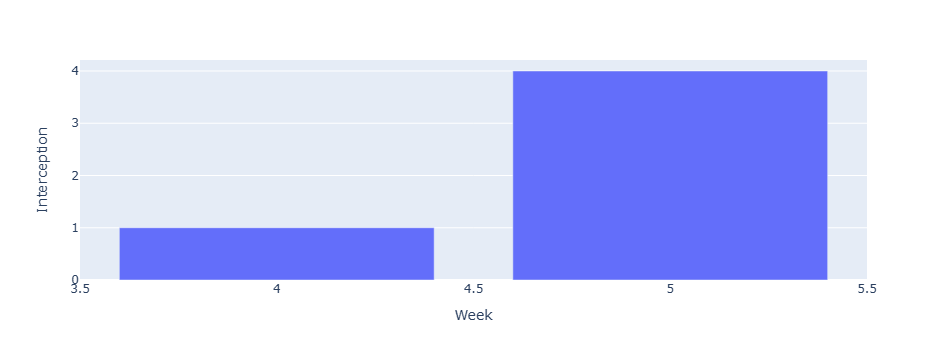

In [21]:
px.bar(df_player, x=df_player['Week'], y=df_player['Interception'])

In [ ]:
url = 'https://www.fantasypros.com/nfl/stats/qb.php?week=1&range=week&year=2010'

In [ ]:
df = pd.read_html(url)[0]

In [ ]:
df = df.droplevel(0, axis=1)
df

In [ ]:
df['Player'] = df['Player'].apply(lambda x: x.split(' ')[:2])
df['Player'] = df['Player'].apply(lambda x: ' '.join(x))

In [ ]:
url = 'https://www.nfl.com/stats/player-stats/'

In [ ]:
pd.read_html(url)

In [24]:
a=[1,3,2]

In [26]:
a.sort()

In [29]:
a.unique()

AttributeError: 'list' object has no attribute 'unique'